# Prediction Credit Card

## 1. Set Up And ImportLibraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score,accuracy_score
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore,ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.svm import SVC
%matplotlib inline


In [2]:
df=pd.read_csv("/kaggle/input/train-credit-card/train_s3TEQDk.csv")
df.head(5)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [3]:
df.drop("ID",axis=1,inplace=True)

In [4]:
# Count Columns And Rown
df.shape

(245725, 10)

In [5]:
# Check size DataFrame
df.size

2457250

In [6]:
# Information of DataFrame
df.info

<bound method DataFrame.info of         Gender  Age Region_Code     Occupation Channel_Code  Vintage  \
0       Female   73       RG268          Other           X3       43   
1       Female   30       RG277       Salaried           X1       32   
2       Female   56       RG268  Self_Employed           X3       26   
3         Male   34       RG270       Salaried           X1       19   
4       Female   30       RG282       Salaried           X1       33   
...        ...  ...         ...            ...          ...      ...   
245720    Male   51       RG284  Self_Employed           X3      109   
245721    Male   27       RG268       Salaried           X1       15   
245722  Female   26       RG281       Salaried           X1       13   
245723  Female   28       RG273       Salaried           X1       31   
245724    Male   29       RG269       Salaried           X1       21   

       Credit_Product  Avg_Account_Balance Is_Active  Is_Lead  
0                  No              1045

In [7]:
# Statictics Analystics
df.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [8]:
# Count unique of column in DataFrame
df.nunique()

Gender                      2
Age                        63
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              2
Avg_Account_Balance    135292
Is_Active                   2
Is_Lead                     2
dtype: int64

In [9]:
df.isnull().sum()

Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

## 1. Look For Duplicate Values

In [10]:
df.duplicated().sum()

21

### 1.1 Removing The Duplicate Values


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

## 2. Replacing The Null Value


In [13]:
filler=df['Credit_Product'].mode().values[0]
df['Credit_Product']=df['Credit_Product'].fillna(filler)

In [14]:
df.isnull().sum()

Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

### 3. Data Visualization

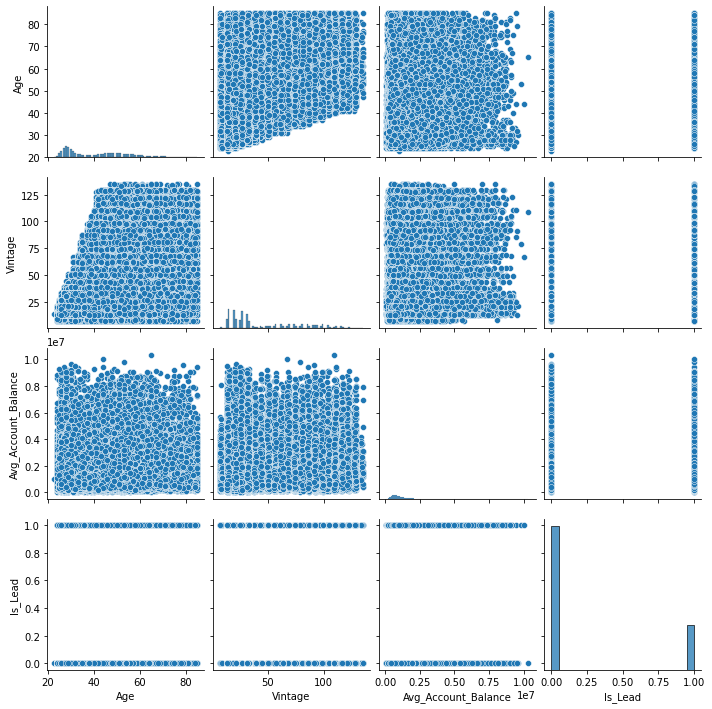

In [15]:
sns.pairplot(df)

<AxesSubplot:xlabel='Avg_Account_Balance'>

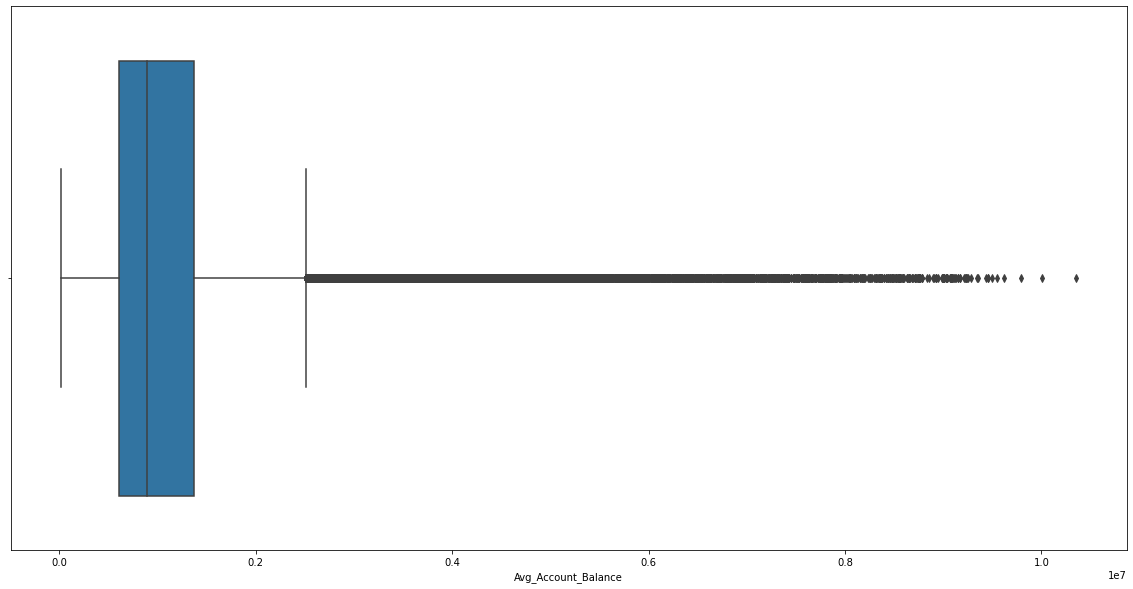

In [16]:
# Looking For Outliers
plt.figure(figsize=(20,10))
sns.boxplot(df['Avg_Account_Balance'])

- As we can see there are outliers we can't remove them because they are considerable outliers

### 4 Look For Imbalance Dataset

<AxesSubplot:xlabel='Is_Lead', ylabel='count'>

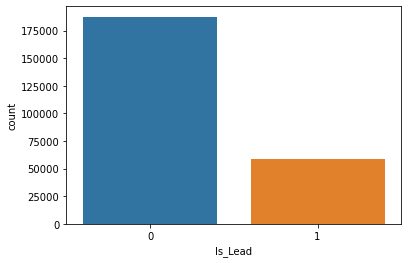

In [17]:
sns.countplot(df['Is_Lead'])

**From the above we can take out following points:**

   - 1. If we take 100 people than from this 100 peoples only 35 people are our customer

<AxesSubplot:xlabel='Occupation', ylabel='Avg_Account_Balance'>

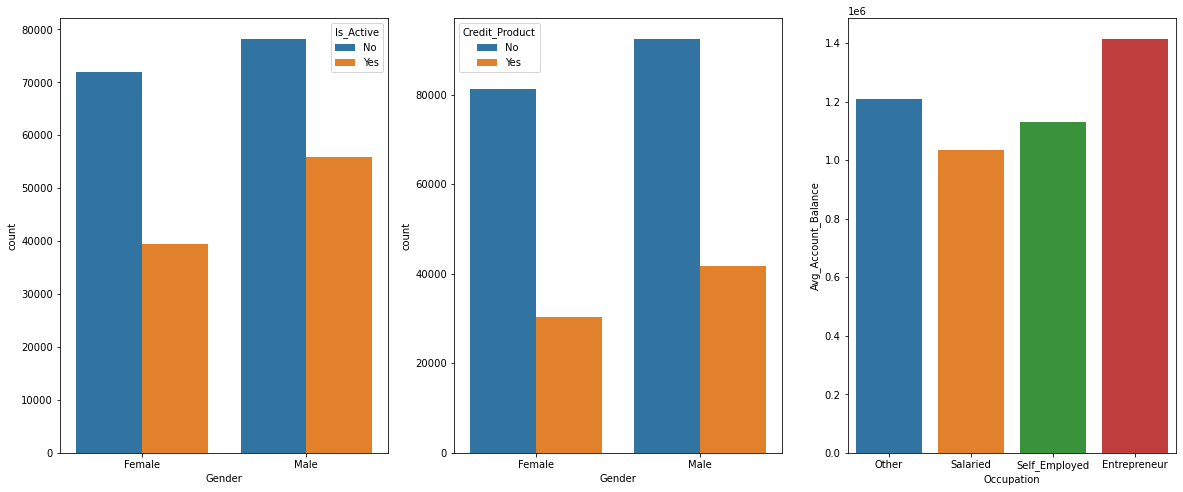

In [18]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.countplot('Gender',hue='Is_Active',data=df)
plt.subplot(1,3,2)
sns.countplot('Gender',hue='Credit_Product',data=df)
plt.subplot(1,3,3)
sns.barplot(df['Occupation'],df['Avg_Account_Balance'],ci=True)

### 4.0.1 1. First graph shows relation between gender and is_active. Following are insight we get from graph no.1.


- In both male and female customer the rate of inactive customer is higher as compared to active customer.
- The rate of active male customer is higher as compared to female customer.

### 4.0.2 Second graph shows relation between gender and credit_product. Following are insight we get from second graph.

- In both male and female customer the rate of customer the rate of customer having credit_product on there credit card is higher as compared to customer not having credit_product.

- Male customer having_credit product is higher as compared to female having credit product.

<AxesSubplot:xlabel='Age', ylabel='Density'>

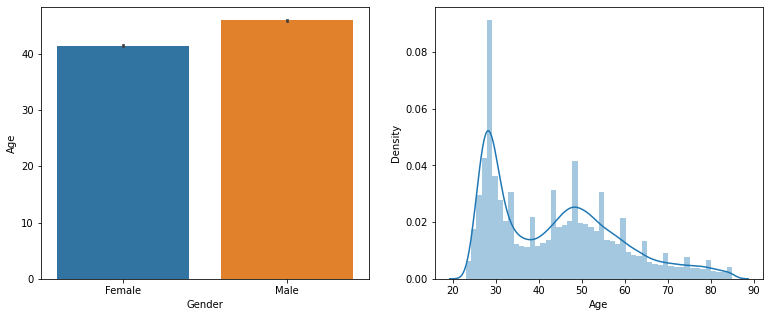

In [19]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.barplot(df['Gender'],df['Age'])
plt.subplot(1,3,2)
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Avg_Account_Balance', ylabel='Count'>

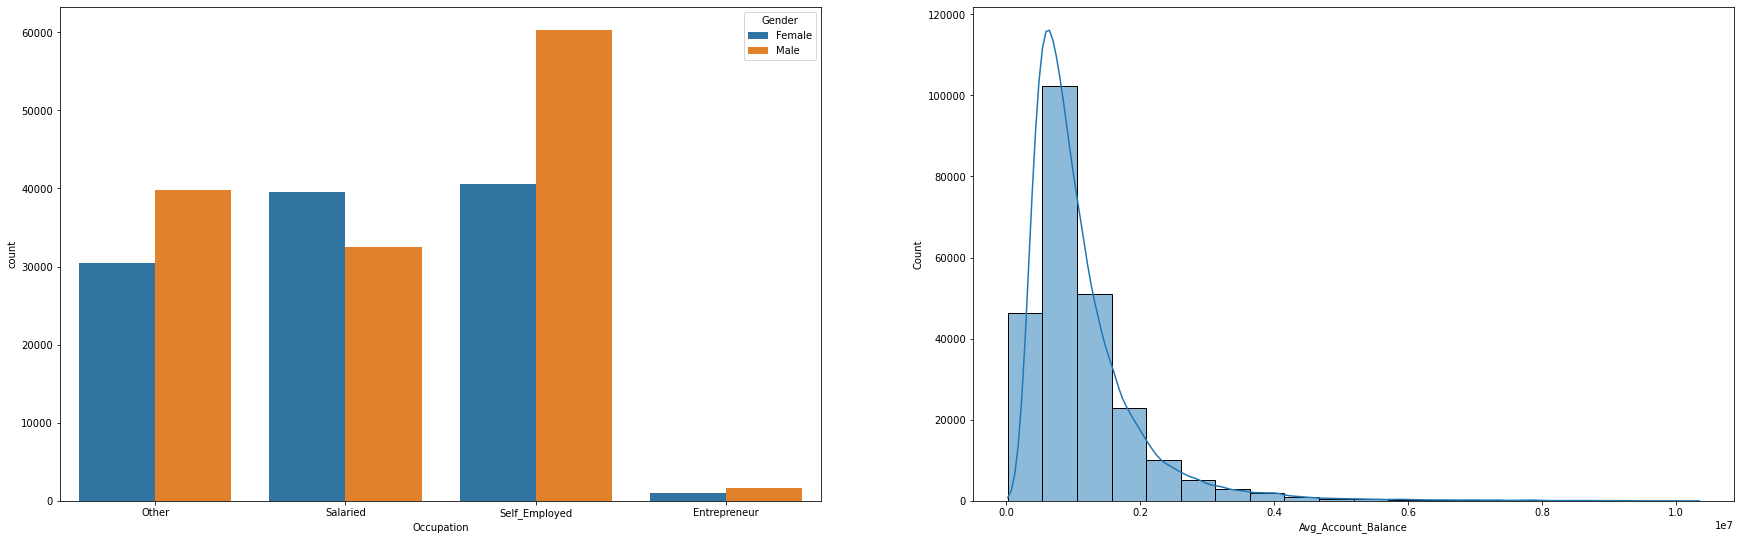

In [20]:
plt.figure(figsize=(30,20))
plt.subplot(2,2,1)
sns.countplot("Occupation",hue='Gender',data=df)
plt.subplot(2,2,2)
sns.histplot(df['Avg_Account_Balance'],kde=True,bins=20)

**4.0.4 As we can see that the no.salaries females are more as compared to male.
male are more self employed and entrepreneur.**


**4.0.5 The average account balance  lies between 0.1 million to half million.**

<AxesSubplot:xlabel='Age', ylabel='count'>

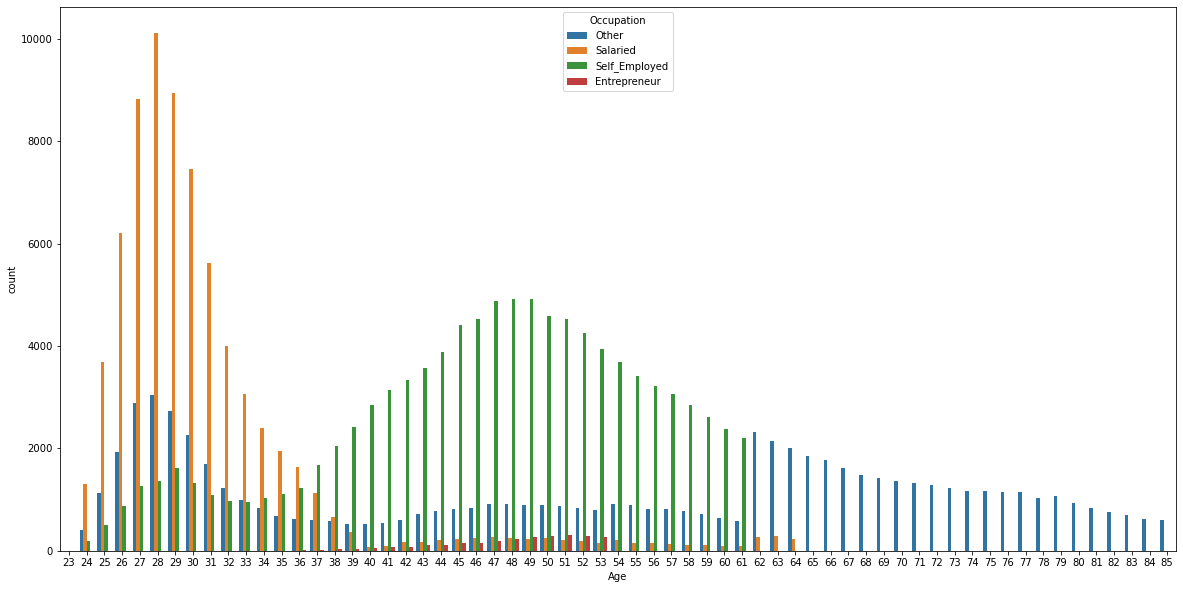

In [21]:
plt.figure(figsize=(20,10))
sns.countplot("Age",hue='Occupation',data=df)

**4.0.6 AS we can see the salaried people are more in the age group of 24 to 36.**

**4.0.7 there is a sudden increase in the self employement after the age of 36 in a age
group of 37 to 61.**

**4.0.8 in a age group of 62 to 85 there is a sudden growth in other(retired).**

**4.0.9 in salaried people avg. no. of womens are higher as compared to men.**

### 5. Vintage Analysis visualization

<AxesSubplot:xlabel='Vintage', ylabel='count'>

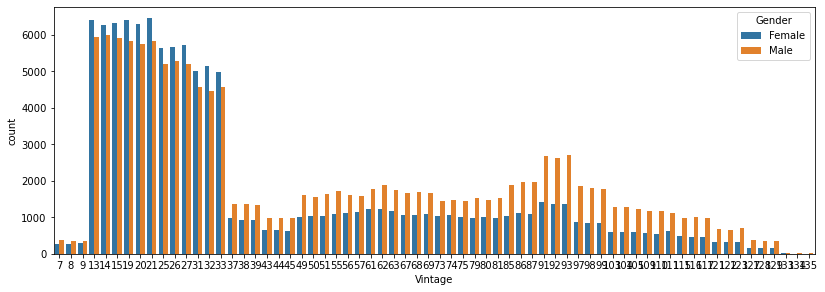

In [22]:
plt.figure(figsize=(30,10))
plt.subplot(2,2,1)
sns.countplot("Vintage",hue='Gender',data=df)

**5.0.1 As we can see there are more than 39k bad customer**

**5.0.2 In avintage range of 13 to 33 womens are higher**

In [23]:
a=(df['Vintage']>90).sum()
a

39854

**5.0.3 As we can see there are more than 39k bad customer**

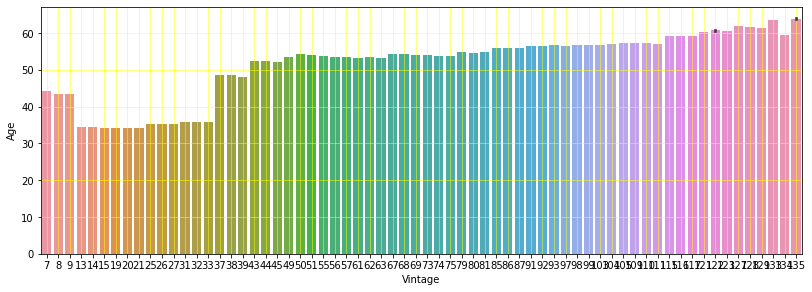

In [24]:
plt.figure(figsize=(30,10))
plt.subplot(2,2,1)
sns.barplot("Vintage","Age",data=df,ci=True)
plt.grid(color="yellow",linewidth=1,axis='both',alpha=0.5)

**5.0.4 Insights from the above graph**

- As the age increase the vintage value also increase.

- People having vintage value in a range of 13 to 33 are mostly salaried.

- As we saw that there suden increase in self employed people after 36 age over here also we can see that there is a sudden increase in vintage after age of around 35.


<AxesSubplot:xlabel='Vintage', ylabel='count'>

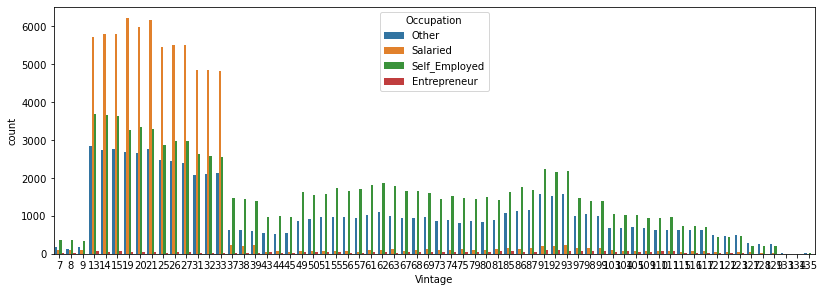

In [25]:
plt.figure(figsize=(30,10))
plt.subplot(2,2,2)
sns.countplot("Vintage",hue="Occupation",data=df)

**5.0.5 Insights from above graph**

- People having vintage value in a range of 13 to 33 are mostly salaries.

- As we saw that there suden increse in self employed people after 36 age over here also we can see that is a sudden insrease in vintage after the age of around 35.

<AxesSubplot:xlabel='Age', ylabel='count'>

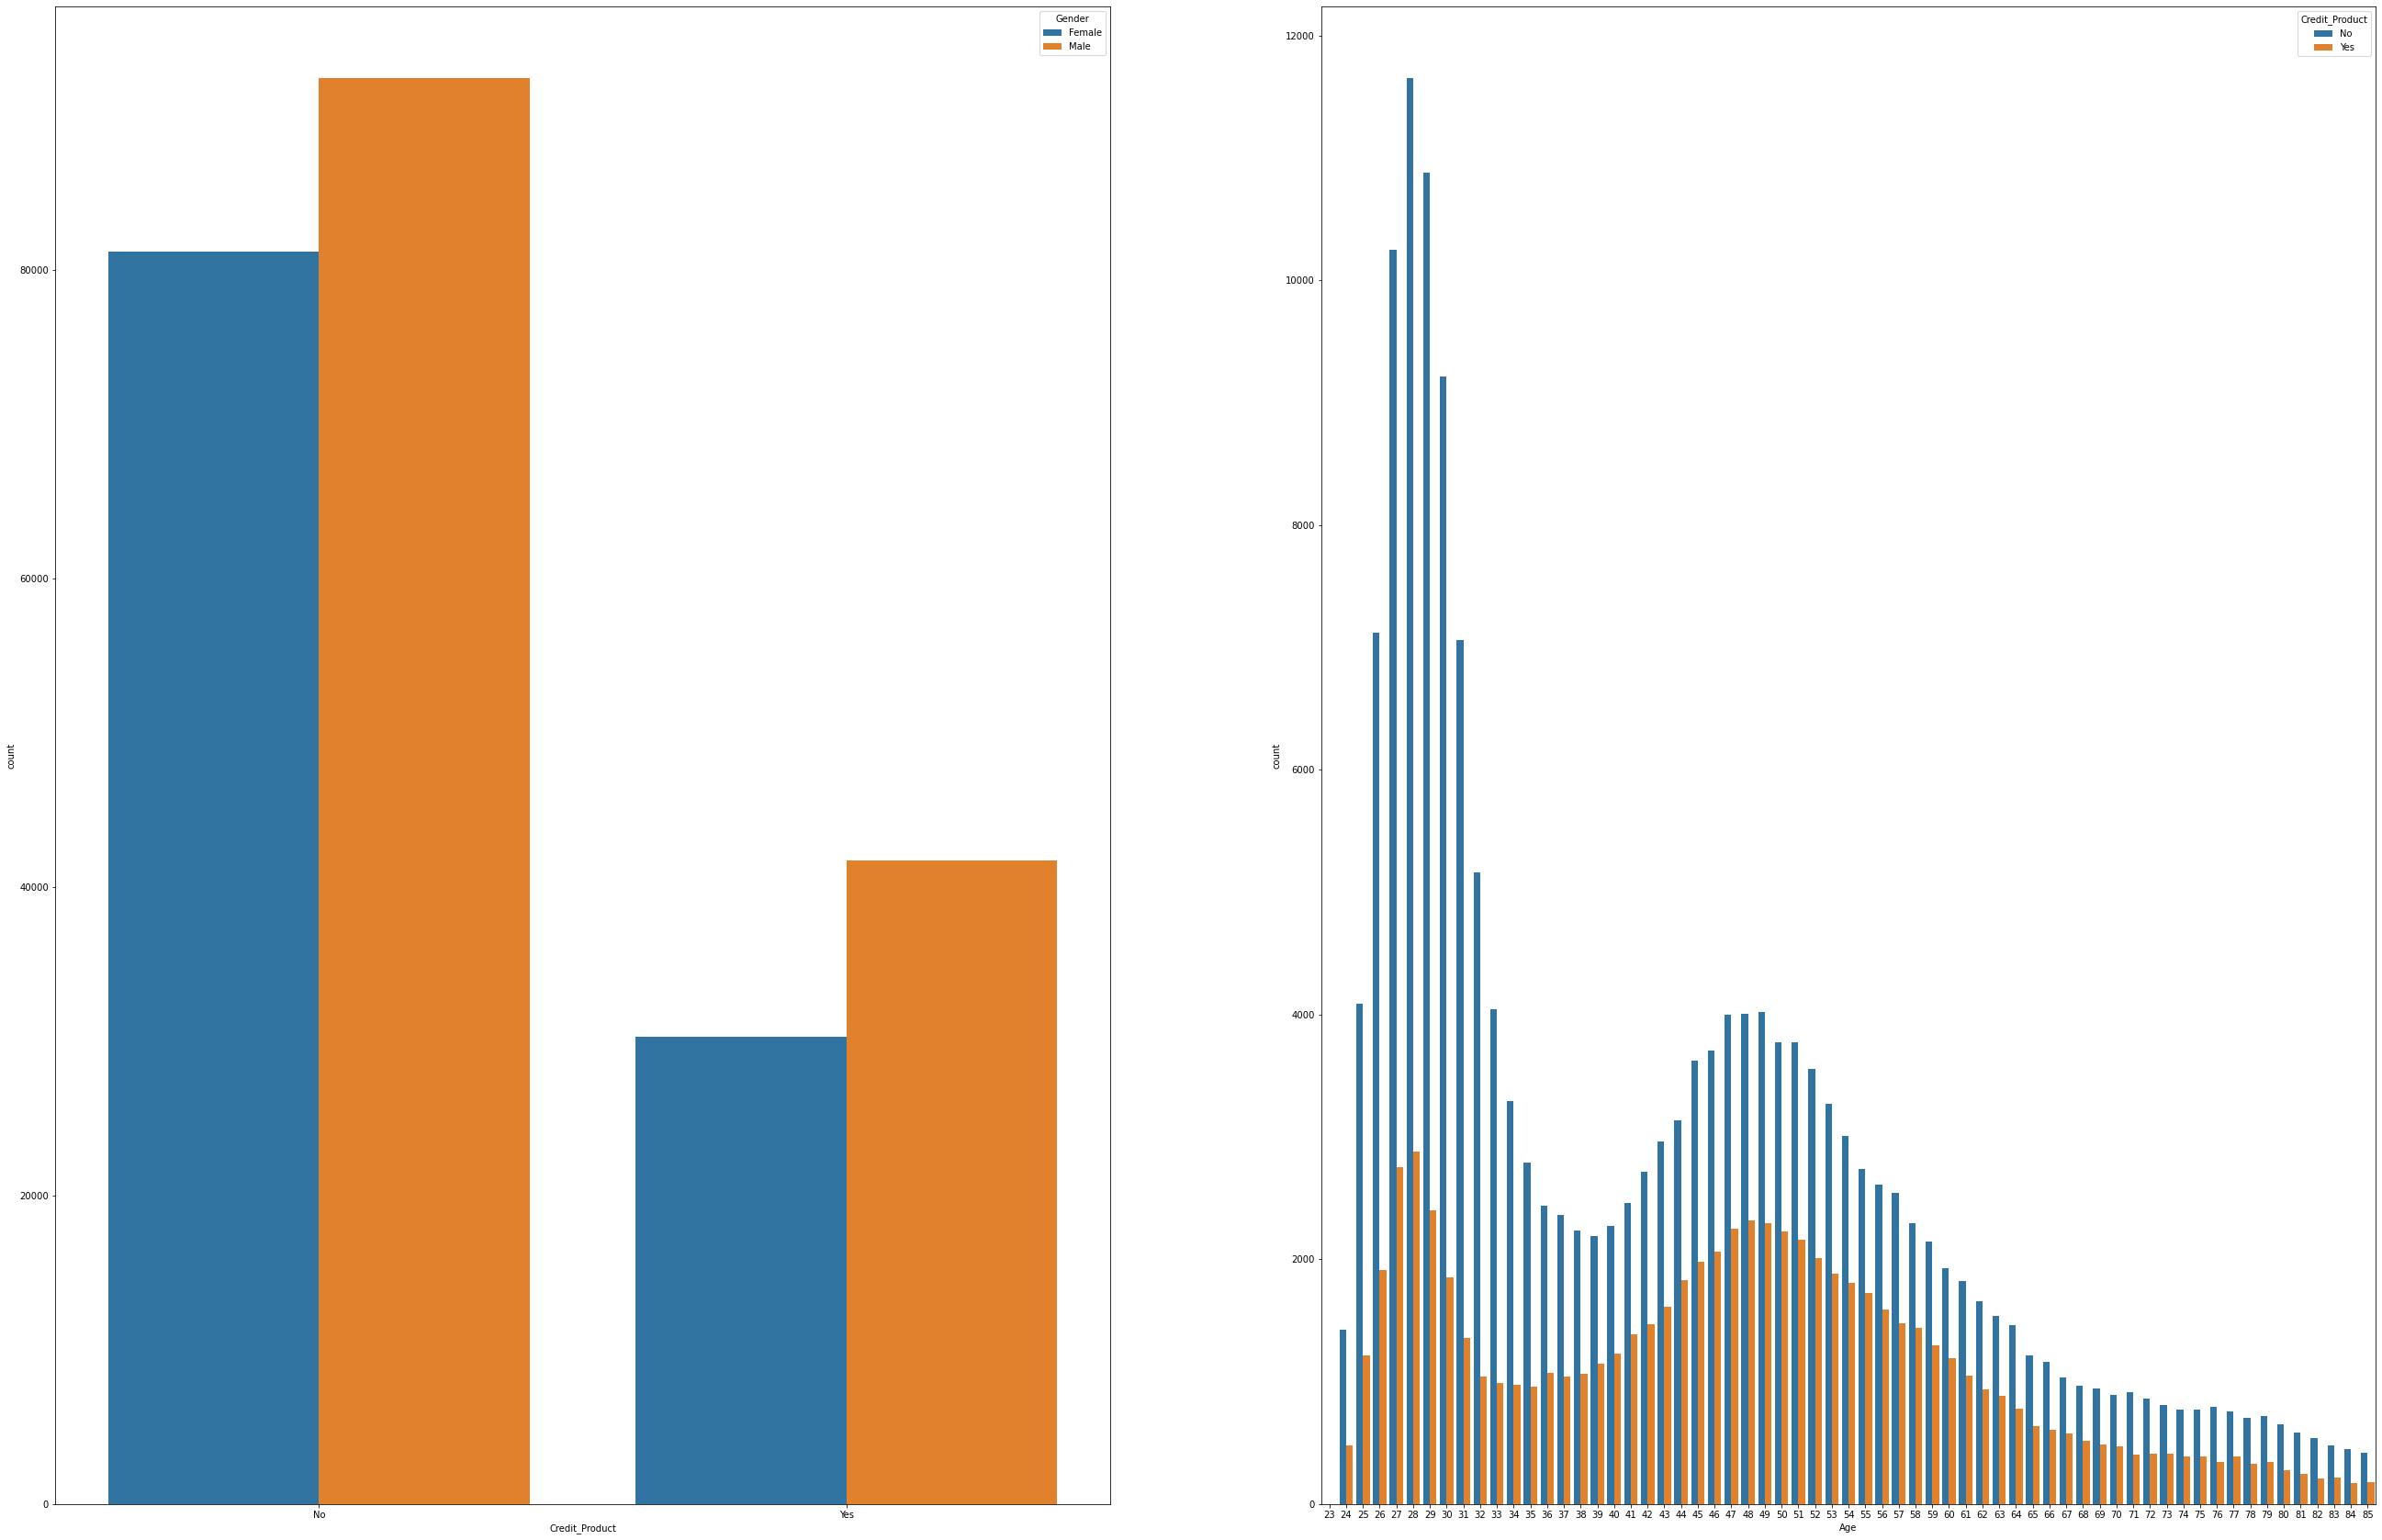

In [26]:
plt.figure(figsize=(70,30))
plt.subplot(1,3,1)
sns.countplot("Credit_Product",hue='Gender',data=df)
plt.subplot(1,3,2)
sns.countplot("Age",hue='Credit_Product',data=df)

<AxesSubplot:xlabel='Avg_Account_Balance', ylabel='Density'>

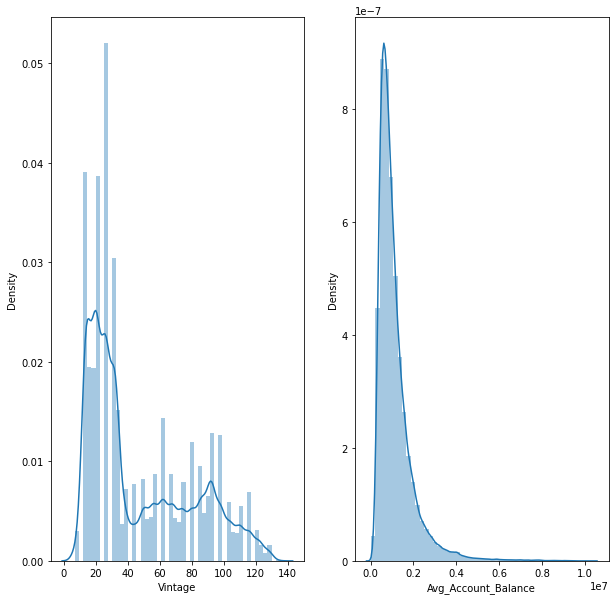

In [27]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
sns.distplot(df['Vintage'])
plt.subplot(1,2,2)
sns.distplot(df['Avg_Account_Balance'])


<AxesSubplot:xlabel='Vintage', ylabel='Avg_Account_Balance'>

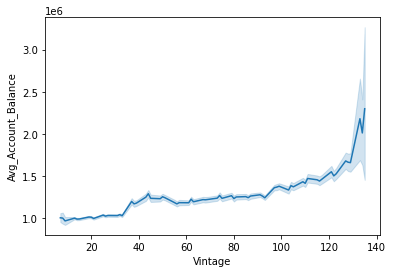

In [28]:
sns.lineplot(df['Vintage'],df['Avg_Account_Balance'])

**5.1 As we can in the graph higher the account balance higher is the vintage value**

### 6. Encoding the columns

In [29]:
ohe=pd.get_dummies(df,columns=['Region_Code'])
ohe

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Region_Code_RG250,...,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284
0,Female,73,Other,X3,43,No,1045696,No,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Female,30,Salaried,X1,32,No,581988,No,0,0,...,0,0,1,0,0,0,0,0,0,0
2,Female,56,Self_Employed,X3,26,No,1484315,Yes,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Male,34,Salaried,X1,19,No,470454,No,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Female,30,Salaried,X1,33,No,886787,No,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,Male,51,Self_Employed,X3,109,No,1925586,No,0,0,...,0,0,0,0,0,0,0,0,0,1
245721,Male,27,Salaried,X1,15,No,862952,Yes,0,0,...,0,0,0,0,0,0,0,0,0,0
245722,Female,26,Salaried,X1,13,No,670659,No,0,0,...,0,0,0,0,0,0,1,0,0,0
245723,Female,28,Salaried,X1,31,No,407504,No,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df=ohe

In [31]:
ohe_2=pd.get_dummies(df,columns=["Gender","Occupation","Channel_Code","Credit_Product","Is_Active"])
ohe_2

,Age,Vintage,Avg_Account_Balance,Is_Lead,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,...,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Is_Active_No,Is_Active_Yes
0,73,43,1045696,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1,30,32,581988,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
2,56,26,1484315,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1
3,34,19,470454,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
4,30,33,886787,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,51,109,1925586,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
245721,27,15,862952,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,1
245722,26,13,670659,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
245723,28,31,407504,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0


In [32]:
df=ohe_2

In [33]:
df

,Age,Vintage,Avg_Account_Balance,Is_Lead,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,...,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Is_Active_No,Is_Active_Yes
0,73,43,1045696,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1,30,32,581988,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
2,56,26,1484315,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1
3,34,19,470454,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
4,30,33,886787,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,51,109,1925586,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
245721,27,15,862952,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,1
245722,26,13,670659,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
245723,28,31,407504,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0


In [34]:
df.shape

(245704, 53)

## 7 See for correlation

<AxesSubplot:>

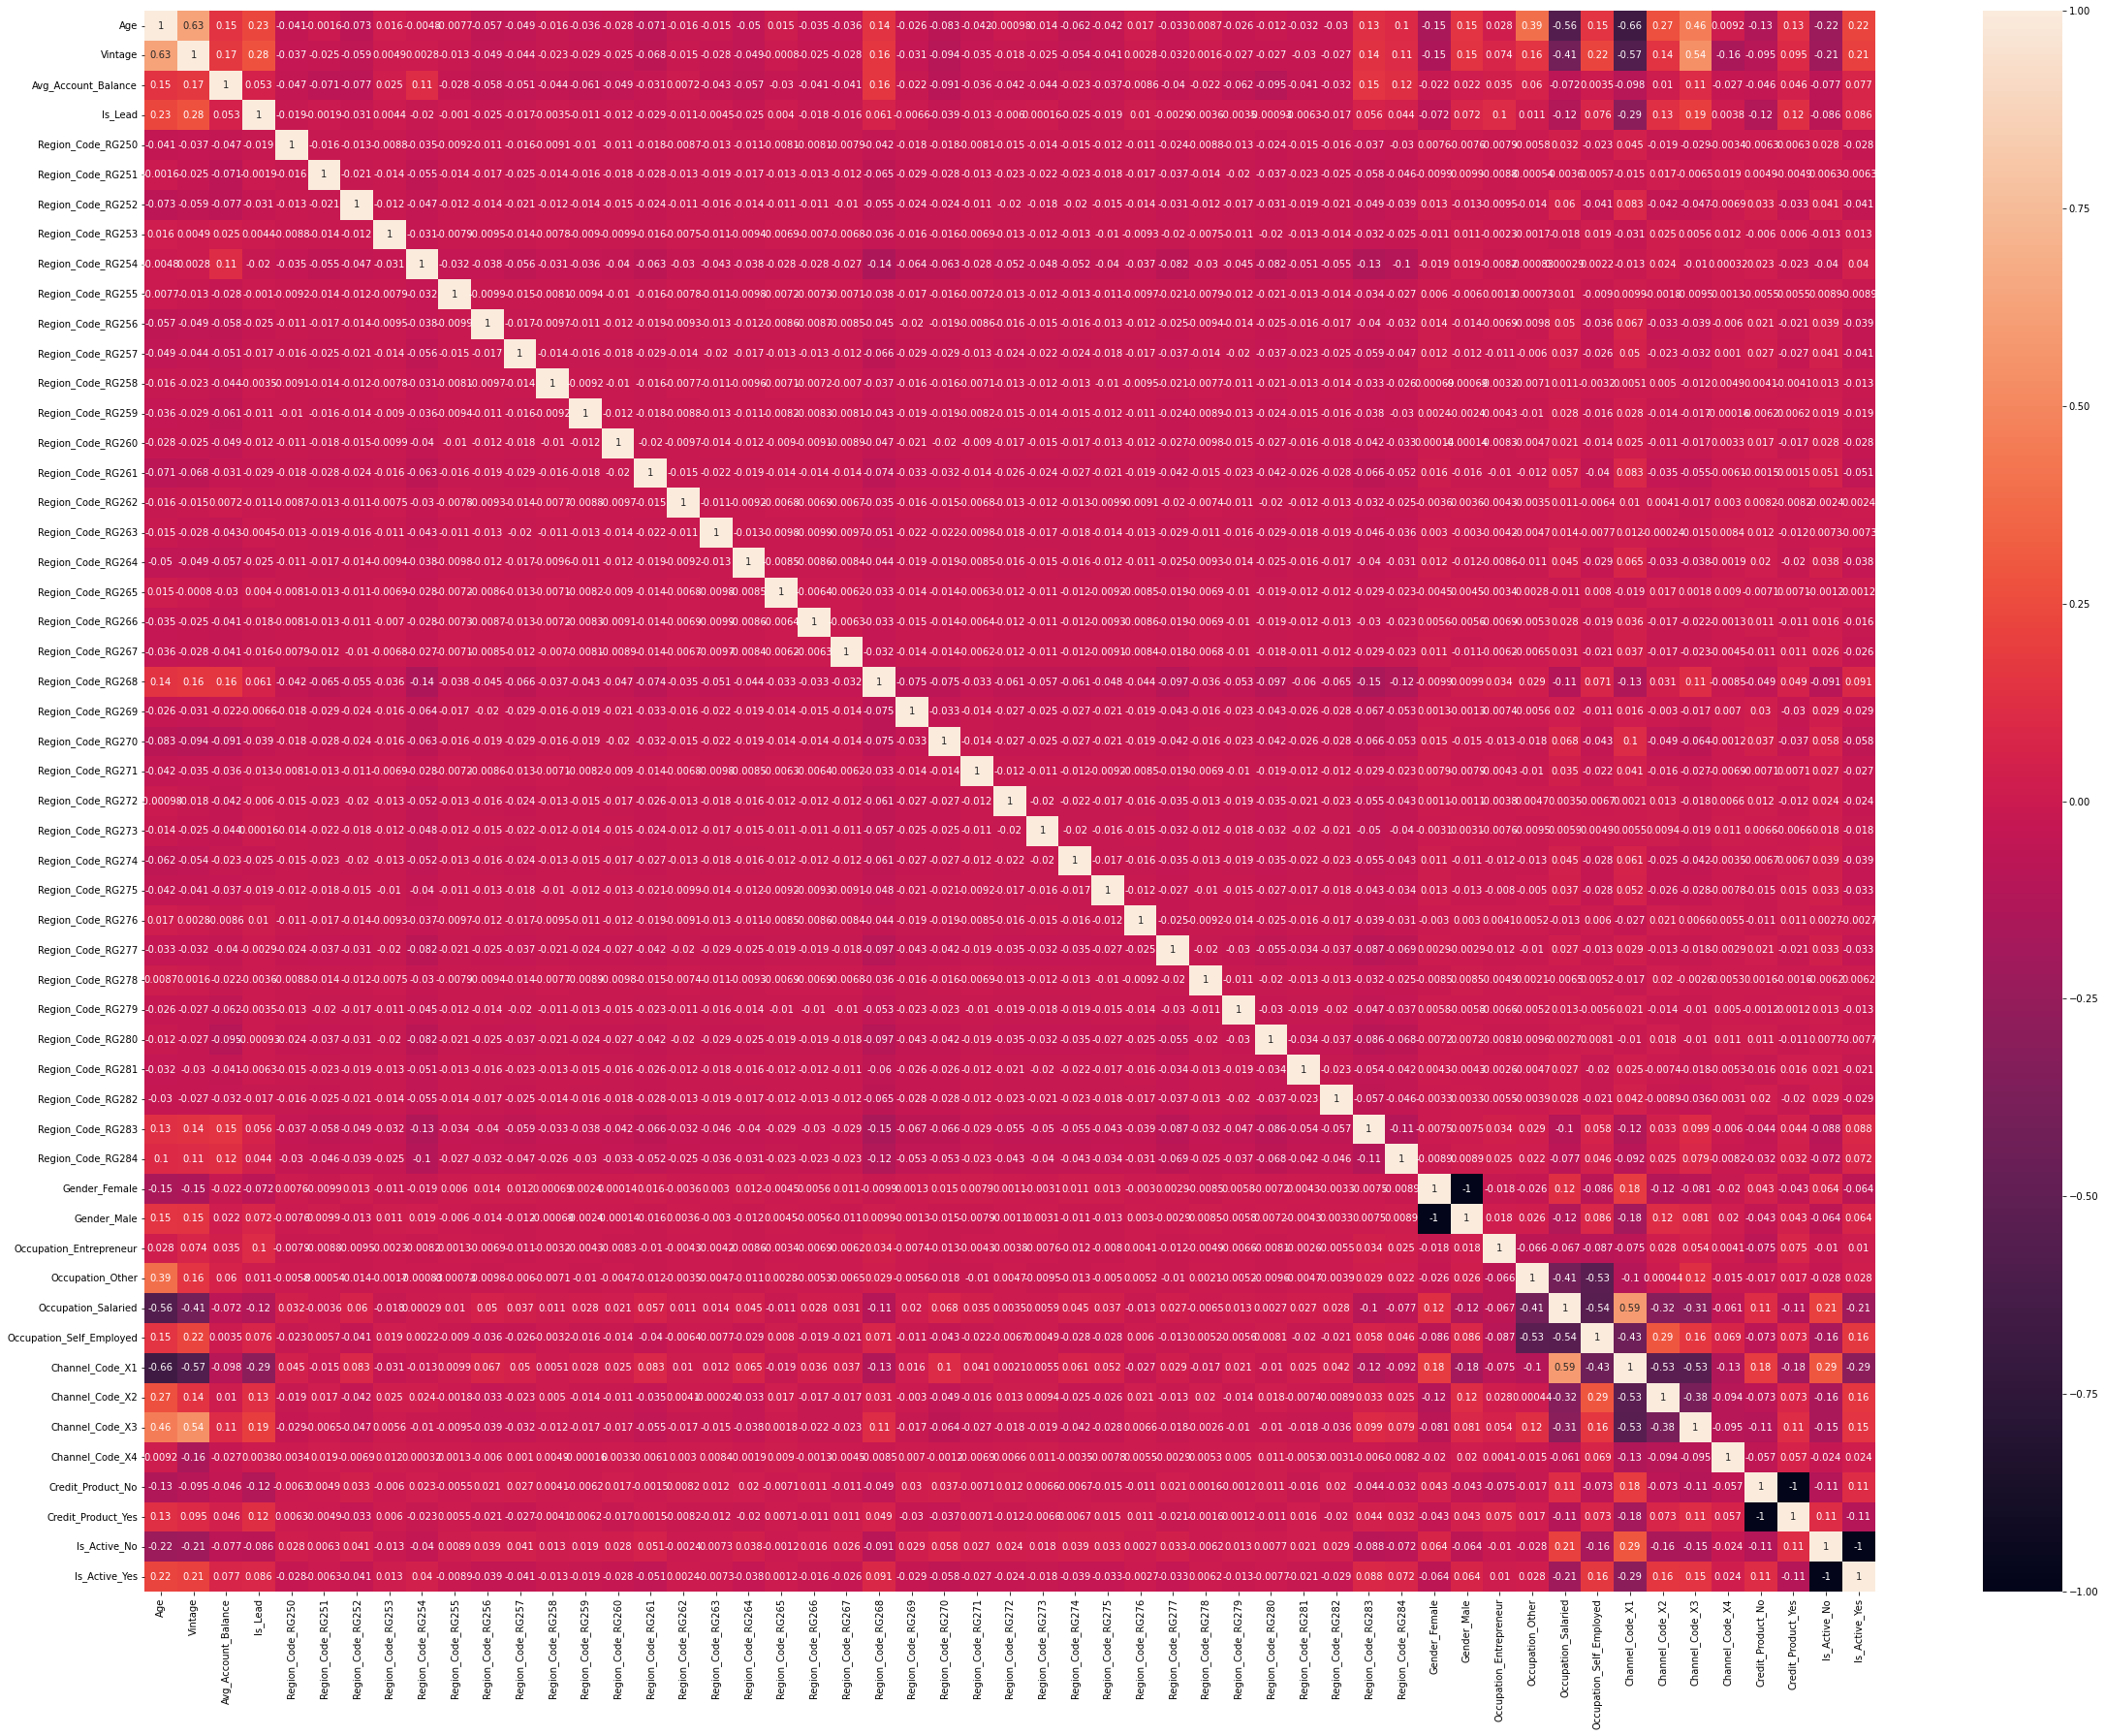

In [35]:
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Avg_Account_Balance', ylabel='Density'>

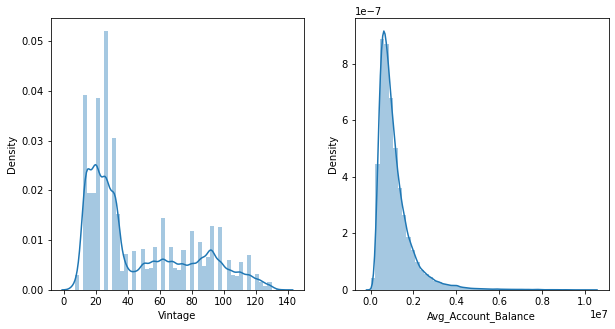

In [36]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df['Vintage'])
plt.subplot(1,2,2)
sns.distplot(df['Avg_Account_Balance'])

## 8 Train Test split

In [37]:
x=df.drop(columns=['Is_Lead'])
y=df['Is_Lead']
x=zscore(x)
x

,Age,Vintage,Avg_Account_Balance,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,...,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Is_Active_No,Is_Active_Yes
0,1.965311,-0.122425,-0.096971,-0.101306,-0.157534,-0.133242,-0.08729,-0.350176,-0.091001,-0.108273,...,-0.643714,-0.834622,-0.854567,-0.616852,1.604979,-0.152286,0.644056,-0.644056,0.796894,-0.796894
1,-0.934506,-0.462418,-0.640625,-0.101306,-0.157534,-0.133242,-0.08729,-0.350176,-0.091001,-0.108273,...,1.553484,-0.834622,1.170183,-0.616852,-0.623061,-0.152286,0.644056,-0.644056,0.796894,-0.796894
2,0.818871,-0.647869,0.417269,-0.101306,-0.157534,-0.133242,-0.08729,-0.350176,-0.091001,-0.108273,...,-0.643714,1.198148,-0.854567,-0.616852,1.604979,-0.152286,0.644056,-0.644056,-1.254872,1.254872
3,-0.664756,-0.864228,-0.771388,-0.101306,-0.157534,-0.133242,-0.08729,-0.350176,-0.091001,-0.108273,...,1.553484,-0.834622,1.170183,-0.616852,-0.623061,-0.152286,0.644056,-0.644056,0.796894,-0.796894
4,-0.934506,-0.431510,-0.283277,-0.101306,-0.157534,-0.133242,-0.08729,-0.350176,-0.091001,-0.108273,...,1.553484,-0.834622,1.170183,-0.616852,-0.623061,-0.152286,0.644056,-0.644056,0.796894,-0.796894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,0.481683,1.917534,0.934618,-0.101306,-0.157534,-0.133242,-0.08729,-0.350176,-0.091001,-0.108273,...,-0.643714,1.198148,-0.854567,-0.616852,1.604979,-0.152286,0.644056,-0.644056,0.796894,-0.796894
245721,-1.136819,-0.987862,-0.311221,-0.101306,-0.157534,-0.133242,-0.08729,-0.350176,-0.091001,-0.108273,...,1.553484,-0.834622,1.170183,-0.616852,-0.623061,-0.152286,0.644056,-0.644056,-1.254872,1.254872
245722,-1.204257,-1.049679,-0.536667,-0.101306,-0.157534,-0.133242,-0.08729,-0.350176,-0.091001,-0.108273,...,1.553484,-0.834622,1.170183,-0.616852,-0.623061,-0.152286,0.644056,-0.644056,0.796894,-0.796894
245723,-1.069382,-0.493327,-0.845191,-0.101306,-0.157534,-0.133242,-0.08729,-0.350176,-0.091001,-0.108273,...,1.553484,-0.834622,1.170183,-0.616852,-0.623061,-0.152286,0.644056,-0.644056,0.796894,-0.796894


In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=100)

### 9. Standardization Of Data

In [39]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## 10.Model Building

**10.1 LodisticRegression**

In [40]:
logr=LogisticRegression()

In [41]:
logr.fit(x_train,y_train)

LogisticRegression()

In [42]:
y_pred_logr=logr.predict(x_test)


In [43]:
accuracy_score(y_test,y_pred_logr)

0.7752604731929672

**Using gridsearchcv() to improve model performance**

In [44]:
logr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [45]:
params={"max_iter":[20,100],"C":[0.05,1.0]}
logetun=GridSearchCV(logr,params,cv=20)
logetun.fit(x_train,y_train)

GridSearchCV(cv=20, estimator=LogisticRegression(),
             param_grid={'C': [0.05, 1.0], 'max_iter': [20, 100]})

In [46]:
 logetun.best_params_

{'C': 1.0, 'max_iter': 20}

In [47]:
logetun.best_score_

0.7770070451675019

<AxesSubplot:xlabel='Is_Lead'>

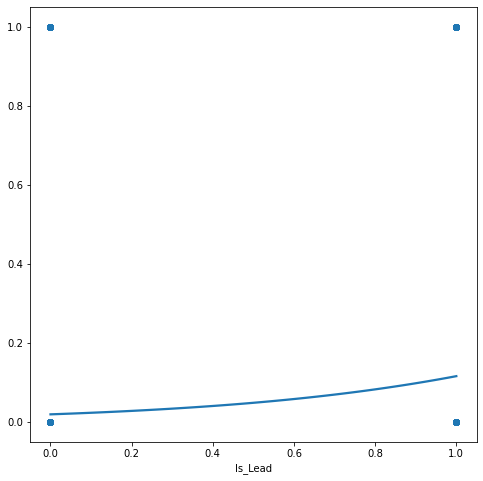

In [48]:
plt.figure(figsize=(8,8))
sns.regplot(x=y_test, y=y_pred_logr, data=df, logistic=True, ci=None)

**10.2 2 Decision Tree**

In [49]:
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=0)

In [50]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

In [51]:
y_pred_dtcm=dtc.predict(x_test)

In [52]:
accuracy_score(y_test,y_pred_dtcm)

0.7847433253744303

**10.2.1 using gridsearchcv() to improve model performance**

In [53]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [54]:
params={"max_depth":[10,20],"max_leaf_nodes":[250,270],"min_samples_split":[5,8]}
dtct=GridSearchCV(dtc,params,cv=10)
dtct.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=6,
                                              random_state=0),
             param_grid={'max_depth': [10, 20], 'max_leaf_nodes': [250, 270],
                         'min_samples_split': [5, 8]})

In [55]:
dtct.best_score_

0.791327501125674

In [56]:
dtct.score(x_train,y_train)

0.7938276198892972

In [57]:
dtct.score(x_test,y_test)

0.7898578250488387

**10.3 3 Random forest**

In [58]:
rfc=RandomForestClassifier()

In [59]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [60]:
y_pred_rfc=rfc.predict(x_test)

In [61]:
accuracy_score(y_test,y_pred_rfc)

0.7734290210549164

**10.3.1 Using gridsearchcv() to improve model performance**

In [62]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [63]:
params={"max_depth":[2,5,10,30],"min_samples_split":[5,10,30],"min_impurity_decrease":[1.0,2.0],"n_estimators":
[20,40],"random_state":[34,40]}
rfct=GridSearchCV(rfc,params,cv=5)
rfct.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 10, 30],
                         'min_impurity_decrease': [1.0, 2.0],
                         'min_samples_split': [5, 10, 30],
                         'n_estimators': [20, 40], 'random_state': [34, 40]})

In [64]:
rfct.best_score_

0.762808735241904

In [65]:
rfct.best_params_

{'max_depth': 2,
 'min_impurity_decrease': 1.0,
 'min_samples_split': 5,
 'n_estimators': 20,
 'random_state': 34}

**10.3.2 As we can see that accuracy desresses after the gridseachcv we will consider
our normal accuracy**

**10.4 4. Ada Boost Classifier**

In [66]:
ada=AdaBoostClassifier()

In [67]:
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [68]:
ada.score(x_test,y_test)

0.7831967657911874

**10.4.1 Using gridsearchcv() to improve model performance**

In [69]:
ada.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [70]:
params={"learning_rate":[1.0],"n_estimators":[200],"random_state":[10]}
adat=GridSearchCV(ada,params,cv=10)
adat.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [1.0], 'n_estimators': [200],
                         'random_state': [10]})

In [71]:
adat.best_params_

{'learning_rate': 1.0, 'n_estimators': 200, 'random_state': 10}

In [72]:
adat.best_params_

{'learning_rate': 1.0, 'n_estimators': 200, 'random_state': 10}

In [73]:
adat.best_score_

0.7822922046576533

### 11 Accuracy Of All The Model
**11.0.1 logestic regression = 0.77**

**11.0.2 Decision tree = 0.79**

**11.0.3 random forest = 0.77**

**11.0.4 adaboost = 0.78**

**11.1 As we can see that the decision tree is having the highest accuracy score as compared to other models so we will consider decision tree model for
this data set**